<a href="https://colab.research.google.com/github/igor531205/statistic/blob/main/statistic_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Выполнил Пушкарев Игорь Игоревич. Группа 23.М08-мм. Вариант 10***

## Методы статистической обработки информации.
### Метод наименьших квадратов в задаче линейной и нелинейной регрессии. Непараметрические коэффициенты корреляции. Значимость частных коэффициентов регрессии.

---

* Вариант 10. Промоделировать нелинейную модель y = f(x, a, b) + δ с несмещенной нормально распределенной ошибкой, дисперсия которой равна ε, считая x стандартно нормально распределенной случайной величиной.
* f(x, a, b) = ax² + bx + c, a = 1, b = 4, c = 2.5, ε = 2

---

*Импортируем необходимые для дальнейшей работы библиотеки.*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import curve_fit
from scipy.stats import f_oneway, pearsonr, t, f

*Произведем моделирование нелинейной модели y = f(x, a, b) + δ*

In [ ]:
# Параметры модели
a = 1
b = 4
c = 2.5
epsilon = 2
N = 100

# Генерация нормально распределенной случайной величины x
np.random.seed(10)
X = np.random.normal(0, 1, N)  # X ~ N(0, 1)
delta = np.random.normal(0, np.sqrt(epsilon), N)  # δ ~ N(0, ε)

# Функция f(x, a, b) нелинейной модели
def F(x, a, b, c):
    return a * x**2 + b * x + c

# Функция y = alpha + beta*x линейной модели
def L(x, alpha, beta):
    return alpha + beta * x

# Генерация Y
Y = F(X, a, b, c) + delta

# Выводим часть сгенерированных данных
print(f'f(X, a, b) = Y\n'+'-'*20)
for i in range(5):
    print(f'f({i}, {a}, {b}) = {Y[i]:.5f}')

f(X, a, b) = Y
--------------------
f(0, 1, 4) = 9.76560
f(1, 1, 4) = 3.17519
f(2, 1, 4) = -2.59853
f(3, 1, 4) = 3.13086
f(4, 1, 4) = 5.16724


---

* Оценить параметры нелинейной модели по методу наименьших квадратов (численно). Применить к модельным данным линейную модель и оценить параметры. Построить на двумерной диаграмме основную и линейную модель. Сравнить невязки для обеих моделей.

---

In [ ]:
# Оценка параметров нелинейной модели
popt_f, pcov_f = curve_fit(F, X, Y)

# Оценка параметров линейной модели
popt_l, pcov_l = curve_fit(L, X, Y)

a_est, b_est, c_est = popt_f
A_est, B_est = popt_l

print(f'Функция нелинейной модели Y = {a_est:.3f}x² + {b_est:.3f}x + {c_est:.3f}')
print(f'Функция линейной модели Y = {A_est:.3f}x + {B_est:.3f}')

Функция нелинейной модели Y = 0.964x² + 4.100x + 2.624
Функция линейной модели Y = 3.518x + 4.266


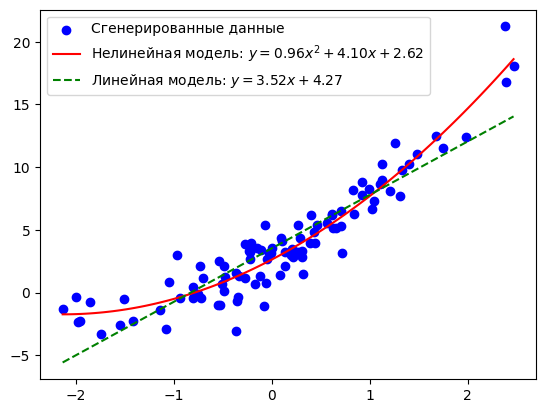

In [ ]:
# Генерация значений X для графиков
x_range = np.linspace(X.min(), X.max(), 100)

# Генерация значений Y для графиков
Y_f = F(x_range, *popt_f)
Y_l = L(x_range, *popt_l)

# Построение графика
plt.scatter(X, Y, color='blue', label='Сгенерированные данные')
plt.plot(x_range, Y_f, 'r-', label=f'Нелинейная модель: $y = {a_est:.2f}x^2 + {b_est:.2f}x + {c_est:.2f}$')
plt.plot(x_range, Y_l, 'g--', label=f'Линейная модель: $y = {A_est:.2f}x + {B_est:.2f}$')
plt.legend()
plt.show()

Из графика видно, что нелинейная модель хорошо описывает данные, несмотря на шум.

---

* Для линейной модели выполнить дисперсионный анализ, проверить значимость прогноза и коэффициентов регрессии. Сравнить непосредственные вычисления с результатами встроенной функции.

---

In [ ]:
# Генерация значений Y для графиков
Y_f = F(X, *popt_f)
Y_l = L(X, *popt_l)

# Источники вариации
QT = np.sum((Y - np.mean(Y))**2) # общий
QR = np.sum((Y_l - np.mean(Y))**2) # обусловленный регрессией
QE = np.sum((Y - Y_l)**2) # невязка

print(f'{QT=:.3f}, {QR=:.3f}, {QE=:.3f}')

QT=2067.385, QR=1701.723, QE=365.663


In [ ]:
print(f'{QT=:.3f} == {QR+QE=:.3f}')  # проверка равенства коэффициентов

QT=2067.385 == QR+QE=2067.385


In [ ]:
# Коэффициент детерминации R²
R2 = QR / QT

print(f'{R2=:.2f}')

R2=0.82


Коэффициент детерминации примерно равен 0.82, это означает, что модель
описывает примерно 82% информации.

In [ ]:
multiply_x = np.sum((X - np.mean(X))**2)
S2 = QE / (N-2)
S2_alpha = (S2 * np.sum(X**2)) / (N * multiply_x)
S2_beta = S2 / multiply_x

# Статистики
stat_F = (QR * (N-2)) / QE
P_Fisher = 1 - f.cdf(stat_F, 2, N-2)

print(f'{P_Fisher=}')

T_alpha = A_est / np.sqrt(S2_alpha)
P_alpha = 2 * (1 - t.cdf(np.abs(T_alpha), N-2))

print(f'{P_alpha=}')

T_beta = B_est / np.sqrt(S2_beta)
P_beta = 2 * (1 - t.cdf(np.abs(T_beta), N-2))

print(f'{P_beta=}')

P_Fisher=1.1102230246251565e-16
P_alpha=0.0
P_beta=0.0


In [ ]:
X_sm = sm.add_constant(X)
model = sm.OLS(Y, X_sm)
results = model.fit()

# Сравнение коэффициентов детерминации и p-значений
(R2, results.rsquared), (P_Fisher, results.f_pvalue), (P_alpha, results.pvalues[0]), (P_beta, results.pvalues[1])

((0.8231279467142765, 0.8231279429465482),
 (1.1102230246251565e-16, 1.2074224068039624e-38),
 (0.0, 4.111660967504188e-33),
 (0.0, 1.2074224068040268e-38))

Коэффициент детерминации (R²): модель объясняет примерно 82.31% вариации данных, что указывает на хорошее соответствие модели.

Коэффициэнт Фишера: Оба P-value меньше 0.05, что подтверждает статистическую значимость регрессионной модели.

Значимость коэффициентов регрессии: Коэффициента значимы, так как P-value для них меньше порога 0.05.

Все результаты подтверждают значимость регрессионной модели и её коэффициентов. Различия в точных значениях P-value между непосредственными вычислениями и встроенными функциями можно объяснить различиями в точности вычислений и алгоритмах, используемых библиотекой statsmodels. Но в обоих случаях выводы о значимости модели согласуются.

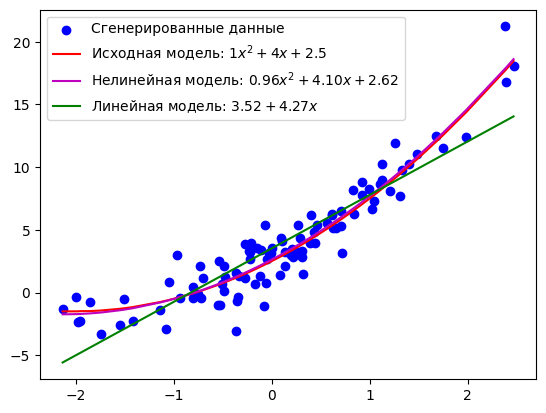

In [ ]:
# Построение графика
Y_original_f = F(X, a, b, c)
plt.scatter(X, Y, color='blue', label='Сгенерированные данные')
plt.plot(sorted(X), sorted(Y_original_f), 'r-', label=f'Исходная модель: ${a}x^2 + {b}x + {c}$')
plt.plot(sorted(X), sorted(Y_f), 'm-', label=f'Нелинейная модель: ${a_est:.2f}x^2 + {b_est:.2f}x + {c_est:.2f}$')
plt.plot(sorted(X), sorted(Y_l), 'g-', label=f'Линейная модель: ${A_est:.2f} + {B_est:.2f}x$')
plt.legend()
plt.show()

In [ ]:
# Ошибки для каждой модели
f_orig_error = np.sum((Y - F(X, a, b, c))**2)
f_error = np.sum((Y - F(X, *popt_f))**2)
l_error = np.sum((Y - L(X, *popt_l))**2)

print(f'Сумма квадратов ошибок = {f_orig_error:.3f}, для исходной модели {a}x² + {b}x + {c}')
print(f'Сумма квадратов ошибок = {f_error:.3f}, для нелинейной модели {a_est:.2f}x² + {b_est:.2f}x + {c_est:.3f}')
print(f'Сумма квадратов ошибок = {l_error:.3f}, для линейной модели {A_est:.2f}x + {B_est:.2f}')

Сумма квадратов ошибок = 195.135, для исходной модели 1x² + 4x + 2.5
Сумма квадратов ошибок = 193.110, для нелинейной модели 0.96x² + 4.10x + 2.624
Сумма квадратов ошибок = 365.663, для линейной модели 3.52x + 4.27


Сумма квадратов ошибок для линейной модели модели выше, т.к. линейная модель хуже описывает распределение данных.

---

* Данные [addicts.xlsx](https://github.com/igor531205/statistic/raw/main/data/addicts.xlsx). Построить корреляционную матрицу по метрическим переменным sstati, asi4_dr, asi1_med, asi6_soc и выделить наиболее значимую корреляцию. Для этого случая построить двумерную диаграмму.

---

In [ ]:
# ссылка на данные
link = 'https://github.com/igor531205/statistic/raw/main/data/addicts.xlsx'

addicts_sheet_name = 'addicts'

features = ['sstati', 'asi4_dr', 'asi1_med', 'asi6_soc']
target = ['rabdru']

# Считываем данные
use_cols = features + target
addicts=pd.read_excel(link, sheet_name=addicts_sheet_name, usecols=use_cols, index_col=False)

# Отключаем ограничение в отображении столбцов
pd.options.display.max_columns = None

addicts.describe()

,asi1_med,asi4_dr,asi6_soc,rabdru,sstati
count,280.000000,280.000000,280.000000,280.000000,280.000000
mean,0.243607,0.279321,0.418061,8.127143,48.382143
std,0.268022,0.055680,0.250199,5.059656,8.916601
min,0.000000,0.090000,0.000000,0.000000,23.000000
25%,0.000000,0.250000,0.200000,4.000000,43.000000
50%,0.185000,0.300000,0.430000,8.000000,48.000000
75%,0.412500,0.300000,0.600000,12.000000,54.000000
max,1.000000,0.660000,0.970000,21.000000,72.000000


*Проверим пропущенные значения*

In [ ]:
addicts.isna().sum()

asi1_med    0
asi4_dr     0
asi6_soc    0
rabdru      0
sstati      0
dtype: int64

*Построим корреляционную матрицу по метрическим переменным sstati, asi4_dr, asi1_med и asi6_soc*

In [ ]:
correlation_matrix = addicts[features].corr()
correlation_matrix

,sstati,asi4_dr,asi1_med,asi6_soc
sstati,1.000000,0.178986,0.218868,0.191127
asi4_dr,0.178986,1.000000,0.142780,0.294268
asi1_med,0.218868,0.142780,1.000000,0.061617
asi6_soc,0.191127,0.294268,0.061617,1.000000


*Визуально выделим наиболее значимую корреляцию*

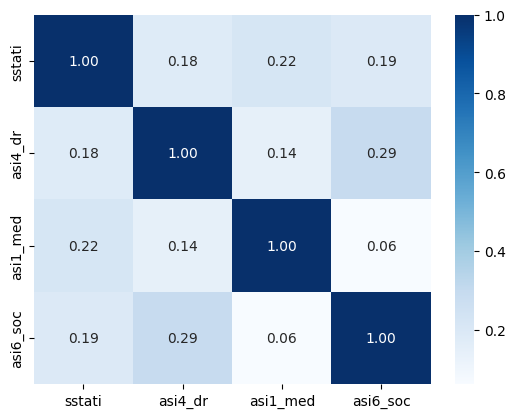

In [ ]:
# Визуализация матрицы корреляций
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.show()

 Взаимосвязь между употреблением наркотиков (asi4_dr) и семейными отношениями (asi6_soc) коррелирует больше всего.

*Построим двумерную диаграмму для них.*

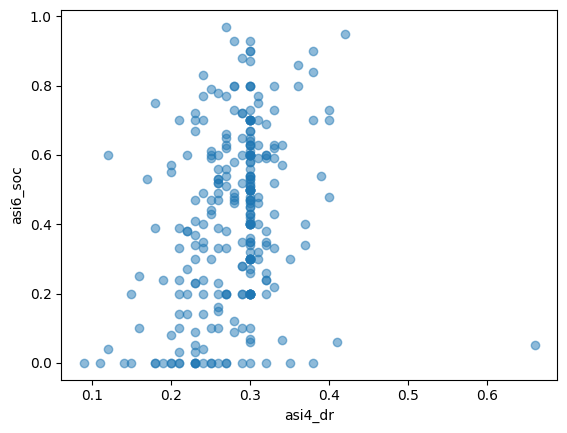

In [ ]:
# Визуализация двумерной диаграммы
plt.scatter(addicts['asi4_dr'], addicts['asi6_soc'], alpha=0.5)
plt.xlabel('asi4_dr')
plt.ylabel('asi6_soc')
plt.show()

Просматриваются точки выстроенные в линии asi6_soc=0.0 и asi4_dr=0.3, что указывает на слабую корреляцию этих двух признаков. Если смотреть на облако точек в целом, то прослеживается увеличение напряженности в семейных отношениях с увеличением употребления наркотиков.

---

* Применить модель множественной регрессии для зависимой переменной rabdru и для независимых переменных sstati, asi4_dr, asi1_med, asi6_soc. Определить значимость прогноза и указать наиболее значимые переменные.

---

In [ ]:
# Функция f(x, a, b) нелинейной модели
def F(x, a, b, c):
    return a * x**2 + b * x + c

In [ ]:
# Оценка параметров нелинейной модели
popt_f, pcov_f = curve_fit(F, addicts['asi4_dr'], addicts['asi6_soc'])

a_est, b_est, c_est = popt_f

print(f'Функция нелинейной модели Y = {a_est:.3f}x² + {b_est:.3f}x + {c_est:.3f}')

Функция нелинейной модели Y = -6.036x² + 4.909x + -0.464


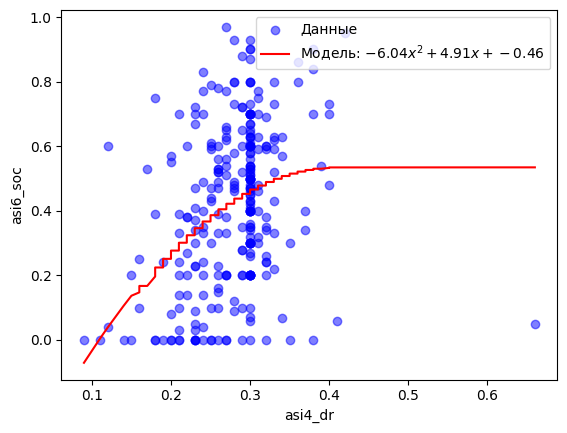

In [ ]:
# Визуализация двумерной диаграммы
Y_f = F(addicts['asi4_dr'], a_est, b_est, c_est)
plt.scatter(addicts['asi4_dr'], addicts['asi6_soc'], alpha=0.5, color='blue', label='Данные')
plt.plot(sorted(addicts['asi4_dr']), sorted(Y_f), 'r-', label=f'Модель: ${a_est:.2f}x^2 + {b_est:.2f}x + {c_est:.2f}$')
plt.xlabel('asi4_dr')
plt.ylabel('asi6_soc')
plt.legend()
plt.show()

In [ ]:
# Подготовка данных для множественной регрессии
X = addicts[features]  # Независимые переменные
y = addicts[target]  # Зависимая переменная

# Добавление константы
X = sm.add_constant(X)

# Применение модели множественной регрессии
model = sm.OLS(y, X).fit()

# Вывод результатов
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rabdru   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.4847
Date:                Thu, 25 Apr 2024   Prob (F-statistic):              0.747
Time:                        19:01:29   Log-Likelihood:                -849.78
No. Observations:                 280   AIC:                             1710.
Df Residuals:                     275   BIC:                             1728.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2674      2.109      3.920      0.000       4.115      12.419
sstati        -0.0083      0.036     -0.231      0.818      -0.079       0.062
asi4_dr        0.7592      5.796      0.131      0.896     -10.651      12.169
asi1_med      -1.3303      1.169     -1.138      0.256      -3.633       0.972
asi6_soc       0.8874      1.286      0.690      0.491      -1.643       3.418
==============================================================================
Omnibus:                       17.125   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.054
Skew:                           0.305   Prob(JB):                      0.00656
Kurtosis:                       2.301   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-квадрат: модель хорошо описывает только 0.7% распределения данных, что указывает на очень слабую подгонку модели к данным.

F-статистика: 0.48 с вероятностью 0.75, показывает, что модель в целом не является статистически значимой. А предсказание не выше среднего.

Анализ коэффициентов:
* sstati - уровень тревожности не является значимым фактором для риска употребления наркотиков;
* asi4_dr - употребление наркотиков не является значимым фактором для риска употребления наркотиков, видимо не достаточно данных, т.к. я считаю этот признак должен быть значимым;
* asi1_med - медицинский статус не является значимым фактором для риска употребления наркотиков;
* asi6_soc - семейные отношения не является значимым фактором для риска употребления наркотиков.

Как видно из результатов, ни одна из независимых переменных не является статистически значимой в предсказании риска употребления наркотиков. Это может означать, что данные переменные не подходят для предсказания данного параметра или модель плохо обучилась.

---

* Найти частный коэффициент корреляции между каждой из независимых переменных sstati, asi4_dr, asi1_med, asi6_soc и зависимой переменной rabdru. Проверить его значимость отклонения от нуля.

---

In [ ]:
# Функция расчета частного коэффициента корреляции и проверки его значимости
def calculate_partial_correlation(data, x, y, controls):
    Y = data[y]
    X_controls = sm.add_constant(data[controls])
    model_y = sm.OLS(Y, X_controls).fit()
    residuals_y = model_y.resid

    X = data[x]
    model_x = sm.OLS(X, X_controls).fit()
    residuals_x = model_x.resid

    corr, p_value = pearsonr(residuals_x, residuals_y)
    return corr, p_value

# Расчет частных корреляций
partial_corrs = {}
for var in features:
    controls = [v for v in features if v != var]
    corr, p_val = calculate_partial_correlation(addicts, var, target, controls)
    partial_corrs[var] = (corr, p_val)

for var, (coef, p_value) in partial_corrs.items():
    print(f"Признак: {var},\t коэффициент корреляции: {coef:.4f},\t p-value (значимость): {p_value:.4f}")

Признак: sstati,	 коэффициент корреляции: -0.0139,	 p-value (значимость): 0.8166
Признак: asi4_dr,	 коэффициент корреляции: 0.0079,	 p-value (значимость): 0.8953
Признак: asi1_med,	 коэффициент корреляции: -0.0684,	 p-value (значимость): 0.2537
Признак: asi6_soc,	 коэффициент корреляции: 0.0416,	 p-value (значимость): 0.4883


Анализ коэффициентов:
* sstati - уровень тревожности не является значимым фактором для риска употребления наркотиков;
* asi4_dr - употребление наркотиков не является значимым фактором для риска употребления наркотиков, видимо не достаточно данных, т.к. я считаю этот признак должен быть значимым;
* asi1_med - медицинский статус не является значимым фактором для риска употребления наркотиков;
* asi6_soc - семейные отношения не является значимым фактором для риска употребления наркотиков.

Все полученные корреляции не отличаются от нуля на статистически значимом уровне. Это означает, что между этими независимыми переменными и переменной 'rabdru' нет значимой линейной связи.